In [74]:
import numpy as np
import matplotlib.pyplot as plt

import tiles3 as tc
import gymnasium as gym
from agents import SarsaLambdaAgent

import time
from tqdm import tqdm
from IPython.display import clear_output

In [160]:
class TileCoder:

    def __init__(self, iht_size, num_tiles, num_tilings):
        self.iht = tc.IHT(iht_size)
        self.num_tiles = num_tiles
        self.num_tilings = num_tilings

    def get_tiles(self, obs):
        x, y, v_x, v_y, theta, angular, leg1, leg2 = obs
        x *= self.num_tiles / 3.0
        y *= self.num_tiles / 3.0
        v_x *= self.num_tiles / 10.0
        v_y *= self.num_tiles / 10.0
        theta *= self.num_tiles / 6.2831854
        angular *= self.num_tiles / 10.0
        tiles = tc.tiles(self.iht, self.num_tilings, [x, y, v_x, v_y, theta, angular, leg1, leg2])
        return tiles

In [161]:
def plot_rewards(total_reward_list):
    plt.figure(figsize=(4, 3))
    plt.plot(total_reward_list, color='mediumseagreen', linewidth=1)
    plt.plot([0, len(total_reward_list)], [200, 200], linestyle='dashed', color='grey', alpha=0.5)
    plt.grid(alpha=0.2)
    plt.title('SARSA(λ) for LunarLander-v2')
    plt.xlabel('Episode')
    plt.ylabel('Total reward per episode')
    plt.show()
    clear_output(wait=True)

def render(env, agent, episode, step, action, reward):
    img = env.render()
    plt.imshow(img)
    plt.text(15, 30, 'Episode: ' + str(episode), color='white')
    plt.text(15, 50, 'Step: ' + str(step), color='white')
    plt.text(15, 70, 'Action: ' + str(action), color='white')
    plt.text(15, 90, 'Reward: ' + str(int(reward)), color='white')
    plt.show()
    print(agent.last_tiles)
    clear_output(wait=True)

In [206]:
env = gym.make(
    'LunarLander-v2',
    continuous=False,
    gravity=-9.81,
    enable_wind=False,
    wind_power=15.0,
    turbulence_power=1.5,
    render_mode=None
)
tilecoder = TileCoder(iht_size=16384, num_tiles=8, num_tilings=8)
agent = SarsaLambdaAgent(num_actions=4, tilecoder=tilecoder)
agent.alpha = 0.5 / tilecoder.num_tilings
agent.gamma = 1.0
agent.epsilon = 0.0
agent.lambd = 0.9
total_reward_list = []
nsteps_list = []

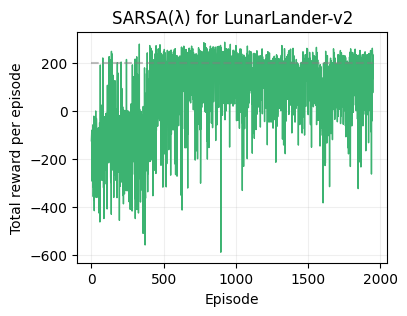

In [209]:
num_episodes = 1000
plot_episode = 50

for episode in range(num_episodes):
    obs, _ = env.reset()
    action = agent.start(obs)
    total_reward = 0
    nsteps = 0
    while True:
        obs, reward, done, over, _ = env.step(action)
        action = agent.step(obs, reward)
        total_reward += reward
        nsteps += 1
        # render(env, agent, episode, nsteps, action, reward)
        if done or over:
            agent.end(reward)
            break
    total_reward_list.append(total_reward)
    nsteps_list.append(nsteps)
    if episode % plot_episode == 0:
        plot_rewards(total_reward_list)


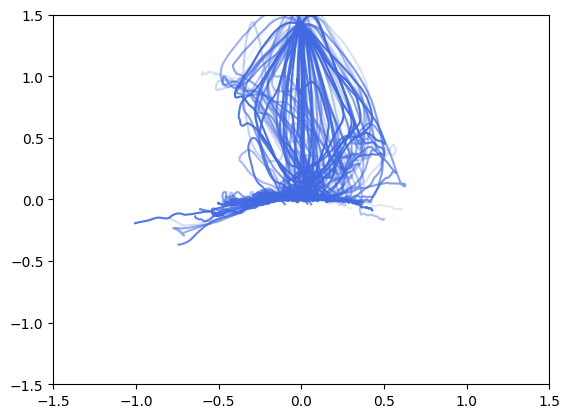

In [210]:
num_episodes = 100
alpha = 0.0

for episode in range(num_episodes):
    obs, _ = env.reset()
    action = agent.start(obs)
    x_list, y_list = [], []
    while True:
        obs, reward, done, over, _ = env.step(action)
        action = agent.step(obs, reward)
        x, y = obs[0], obs[1]
        x_list.append(x)
        y_list.append(y)
        if done or over:
            agent.end(reward)
            break
    plt.plot(x_list, y_list, color='royalblue', alpha=alpha)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    alpha += 0.01